In [60]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Define degree and weight list generators.

In [61]:
#generate random weight
def ran_weight(l, min, max):
    #l: length of the list
    #max/min: max/min of the list element
    randomlist = []
    for i in range(l):
        n = random.randint(min,max)
        randomlist.append(n)

    return randomlist

#generate random degree for simple connected diagram
def ran_deg(l, min=1 , max=None):
    #l: length
    #max/min: max/min of the degree
    max-=1
    list = []
    for i in range(l):
        n = random.randint(min,max)
        list.append(n)
    
    if sum(list)%2 != 0:
        k = int(random.random()*l)
        if list[k] == 1:       
            list[k] = list[k] + 1
        else:
            list[k] = list[k] - 1
    
    return list

Example for a random graph.

degree= [6, 4, 4, 4, 5, 5, 3, 6, 4, 5]
weight= [6, 6, 9, 1, 8, 9, 4, 10, 10, 8]
graph degree sequence [(0, 6), (1, 4), (2, 4), (3, 4), (4, 5), (5, 5), (6, 3), (7, 6), (8, 4), (9, 5)]


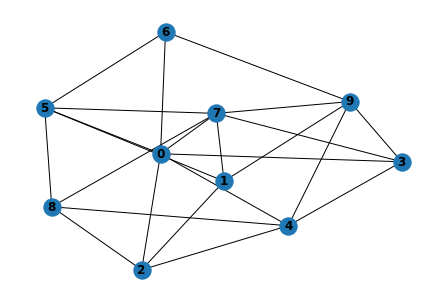

In [62]:
from Gphase import Gphase

length = 10
d_min = 2 #minimal degree, not suggested to be 1 for small d_max
d_max = 7 #maximal degree, where d_max < length, d_max not suggested to be small
w_min = 1 
w_max = 10

degree = ran_deg(length, d_min, d_max)
weight = ran_weight(length, w_min, w_max)

print('degree=', degree)
print('weight=', weight)


GP = Gphase(degree, weight)
G = GP.random_graph_gen()
nx.draw(G, with_labels=True, font_weight='bold')
print('graph degree sequence', G.degree())

Plot phase diagram.

Text(0, 0.5, 'phase value')

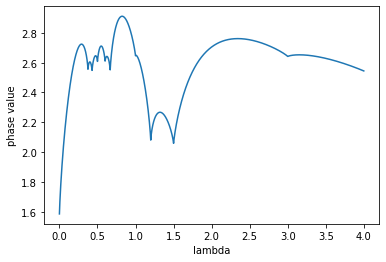

In [63]:
max_lamb = 4
lam_list, chi_list = GP.var_phase('entropy', max_lamb)

plt.plot(lam_list, chi_list)
plt.xlabel('lambda')
plt.ylabel('phase value')

#m_index = GP.transition(chi_list)
#print('transition points are', m_index)

In [64]:
dev1, dev2, m_index = GP.dev(lam_list, chi_list)

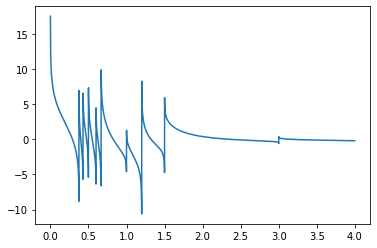

In [65]:
plt.plot(lam_list[:-1], dev1)

transitions at [0.374 0.428 0.499 0.599 0.666 0.999 1.199 1.499 2.999]


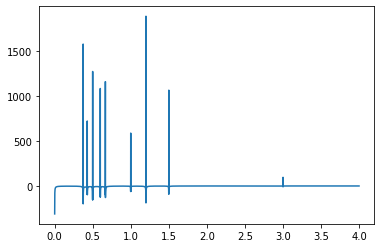

In [66]:
plt.plot(lam_list[:-2], dev2) 
print('transitions at', m_index)

You may compare with the 'repeat' mode, which counts the repeated elements. Although this is equivalent, numerical errors can be difficult to handle.

In [67]:
lam_list, chi_list1 = GP.var_phase('repeat', max_lamb)

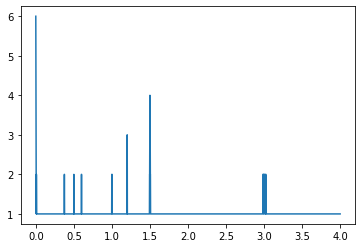

In [68]:
plt.plot(lam_list, chi_list1) 

Reduced weight lists for chosen lambdas. You can do manual verification using this.

In [69]:
l_chosen, w_red = GP.verify_list(m_index, lam_list)

print('choose lambda at', l_chosen)
print('reduced weight', w_red)

choose lambda at [0.187, 0.401, 0.4635, 0.5489999999999999, 0.6325000000000001, 0.8325, 1.099, 1.3490000000000002, 2.249, 3.499]
reduced weight [array([ 0.51074658, -0.18482495, -0.24986089, -0.07643172,  0.11960352,
        0.09792488, -0.48925342,  0.424032  , -0.27153953,  0.11960352]), array([ 0.56612588, -0.16575994, -0.31250305,  0.07881191,  0.10235423,
        0.05343986, -0.43387412,  0.37046841, -0.36141742,  0.10235423]), array([ 0.58340766, -0.15981048, -0.33205128,  0.12725753,  0.09697139,
        0.03955779, -0.41659234,  0.35375325, -0.38946488,  0.09697139]), array([ 0.58612738, -0.14593704, -0.34688873,  0.18898243,  0.08612738,
        0.01914348, -0.37800146,  0.3181918 , -0.41387262,  0.08612738]), array([ 5.73944900e-01, -1.29454865e-01, -3.51905041e-01,  2.41295428e-01,
        7.39449004e-02, -2.05158265e-04, -3.32854631e-01,  2.77344666e-01,
       -4.26055100e-01,  7.39449004e-02]), array([ 0.5483119 , -0.09477492, -0.36245981,  0.35136656,  0.0483119 ,
      

Calculate maximum weight by calcuating for every lambda.

In [70]:
w_tot_list = []
L_list = []

for w_reduced in w_red:
    I, w_tot = GP.total_weight(G, w_reduced, weight)
    L_list.append(I)
    w_tot_list.append(w_tot)

max_index = w_tot_list.index(max(w_tot_list))
print('all calculated weights', w_tot_list)
print('maximum weight is ', max(w_tot_list))
print('chosen nodes are', L_list[max_index])

all calculated weights [21, 21, 21, 21, 21, 21, 21, 21, 24, 24]
maximum weight is  24
chosen nodes are [8, 9, 0]


Plot real phase diagram (for small graph).

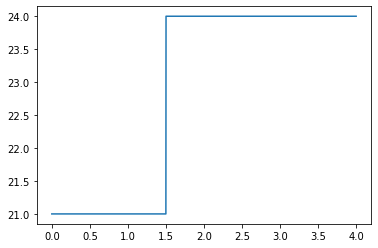

In [71]:
w_list = GP.phase_all(G, lam_list)
plt.plot(lam_list, w_list)

In [72]:
real_transitions = find_peaks(abs(np.diff(w_list)))[0]/1000
print(real_transitions)


[1.499]


Check if it is in the pervious set of transition points.

In [73]:
real_transitions = [round(i,2) for i in real_transitions]
m_index = [round(i,2) for i in m_index]
for i in real_transitions:
    if i in m_index:
        print(True)
    else:
        print(i, 'is not a transtion.')

True
